##Cat-Seg segmentation in 360 images SOFIA:

In [ ]:
%cd /content/
!wget https://github.com/cvlab-kaist/CAT-Seg/archive/refs/heads/demo.zip
!unzip /content/demo.zip

/content
--2024-12-02 10:51:48--  https://github.com/cvlab-kaist/CAT-Seg/archive/refs/heads/demo.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/cvlab-kaist/CAT-Seg/zip/refs/heads/demo [following]
--2024-12-02 10:51:48--  https://codeload.github.com/cvlab-kaist/CAT-Seg/zip/refs/heads/demo
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘demo.zip’

demo.zip                [     <=>            ]   3.47M  3.81MB/s    in 0.9s    

2024-12-02 10:51:49 (3.81 MB/s) - ‘demo.zip’ saved [3641785]

Archive:  /content/demo.zip
64e7e7db2ea44b286a13f5ac2c8fceaa3677a5d1
   creating: CAT-Seg-demo/
  inflating: CAT-Seg-demo/INSTALL.m

##Accessing Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Installing the required libraries:

In [ ]:
%cd /content/CAT-Seg-demo/
!pip install -r requirements.txt

/content/CAT-Seg-demo
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-x6__xc1m
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-x6__xc1m
  Resolved https://github.com/facebookresearch/detectron2.git to commit c69939aa85460e8135f40bce908a6cddaa73065f
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement setuptool (from versions: none)
ERROR: No matching distribution found for setuptool


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
!pip install --upgrade torch torchvision


In [ ]:
!pip install --upgrade torch torchvision
!pip install --upgrade detectron2
#!pip install --upgrade git+https://github.com/facebookresearch/segment-anything.git


ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2


##Downloading the Cat-Seg Large model for image inference:

In [ ]:
%cd /content/CAT-Seg-demo/
!wget https://huggingface.co/hamacojr/CAT-Seg/resolve/main/model_final_large.pth
!wget https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_large_patch4_window12_384_22k.pth
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content/CAT-Seg-demo
--2024-12-02 10:55:59--  https://huggingface.co/hamacojr/CAT-Seg/resolve/main/model_final_large.pth
Resolving huggingface.co (huggingface.co)... 13.35.210.77, 13.35.210.114, 13.35.210.66, ...
Connecting to huggingface.co (huggingface.co)|13.35.210.77|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/91/3c/913cc695dbc1db4cb10588dbf5f69bc7d6825edfcfea622c5d125b9b5aa26751/b4eefbb26795ddb78c877684f76b9a8e0f4367304dfc867b216285fb51f072b9?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model_final_large.pth%3B+filename%3D%22model_final_large.pth%22%3B&Expires=1733396160&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczMzM5NjE2MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy85MS8zYy85MTNjYzY5NWRiYzFkYjRjYjEwNTg4ZGJmNWY2OWJjN2Q2ODI1ZWRmY2ZlYTYyMmM1ZDEyNWI5YjVhYTI2NzUxL2I0ZWVmYmIyNjc5NWRkYjc4Yzg3NzY4NGY3NmI5YThlMGY0MzY3MzA0ZGZjODY3YjIxNjI4NWZiNTFmMDcyY

In [ ]:
%cd /content/CAT-Seg-demo/open_clip
!make install

/content/CAT-Seg-demo/open_clip
python -m pip install -U pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
python -m pip install -e .
Obtaining file:///content/CAT-Seg-demo/open_clip
  Preparing metadata (setup.py) ... done
  Using cached ftfy-6.3.1-py3-none-any.whl.metadata (7.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  DEPRECATION: Legacy editable install of open_clip_torch==2.10.1 from file:///content/CAT-Seg-demo/open_clip (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resul

##Test the Cat-Seg app demo:

In [ ]:
%cd /content/CAT-Seg-demo/
!python app.py

/content/CAT-Seg-demo
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrus

##The following code was used to run the inference on the images. It processes the input images using the specified configuration and segmentation model, and then saves the results (segmentation masks) directly to a designated folder in Google Drive. The masks are saved in PNG format, each named according to the categories provided in the input text. Below is the code used for this task:



```
# Copyright (c) Facebook, Inc. and its affiliates.
# Modificado por Bowen Cheng: https://github.com/facebookresearch/detectron2/blob/master/demo/demo.py
import argparse
import os

try:
    import detectron2
except ModuleNotFoundError:
    os.system('pip install git+https://github.com/facebookresearch/detectron2.git')

try:
    import segment_anything
except ModuleNotFoundError:
    os.system('pip install git+https://github.com/facebookresearch/segment-anything.git')

import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import cv2
import numpy as np
import torch
from matplotlib.backends.backend_agg import FigureCanvasAgg as fc

from detectron2.config import get_cfg
from detectron2.projects.deeplab import add_deeplab_config

from cat_seg import add_cat_seg_config
from demo.predictor import VisualizationDemo
import gradio as gr

# Configurações
WINDOW_NAME = "CAT-Seg demo"

def setup_cfg(args):
    cfg = get_cfg()
    add_deeplab_config(cfg)
    add_cat_seg_config(cfg)
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    if torch.cuda.is_available():
        cfg.MODEL.DEVICE = "cuda"
    cfg.freeze()
    return cfg

def get_parser():
    parser = argparse.ArgumentParser(description="Demo do Detectron2 para configurações embutidas")
    parser.add_argument(
        "--config-file",
        default="configs/demo.yaml",
        metavar="FILE",
        help="caminho para o arquivo de configuração",
    )
    parser.add_argument(
        "--input",
        nargs="+",
        help="Uma lista de imagens de entrada separadas por espaço; "
             "ou um padrão glob como 'diretorio/*.jpg'",
    )
    parser.add_argument(
        "--opts",
        help="Modificar opções de configuração usando pares 'CHAVE VALOR' na linha de comando",
        default=[],
        nargs=argparse.REMAINDER,
    )
    return parser

def save_masks(preds, text):
    preds = preds['sem_seg'].argmax(dim=0).cpu().numpy()  # H x W
    save_dir = "/content/drive/MyDrive/100_SofiaFRA/Results/Cat-seg"
    os.makedirs(save_dir, exist_ok=True)
    for i, t in enumerate(text):
        file_path = os.path.join(save_dir, f"mask_{t.strip()}.png")
        mask = (preds == i).astype(np.uint8) * 255
        cv2.imwrite(file_path, mask)
    print(f"Máscaras salvas em: {save_dir}")

def predict(image, text, model_type):
    use_sam = model_type != "CAT-Seg"
    predictions, visualized_output = demo.run_on_image(image, text, use_sam)
    save_masks(predictions, text.split(','))
    canvas = fc(visualized_output.fig)
    canvas.draw()
    out = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(canvas.get_width_height()[::-1] + (3,))
    return out[..., ::-1]

if __name__ == "__main__":
    args = get_parser().parse_args()
    cfg = setup_cfg(args)
    global demo
    demo = VisualizationDemo(cfg)

    iface = gr.Interface(
        fn=predict,
        inputs=[
            gr.Image(),
            gr.Textbox(placeholder='background, cat, person'),
            gr.Radio(["CAT-Seg", "Segment Anycat"], value="CAT-Seg")
        ],
        outputs="image",
        description="""## Demonstração do CAT-Seg
Bem-vindo à demonstração do CAT-Seg, onde você pode experimentar o modelo de segmentação semântica de vocabulário aberto de última geração, CAT-Seg!

Também combinamos o modelo CAT-Seg com o SAM (Segment Anything) para rotular semanticamente as previsões de máscara do SAM.

Observe que esta é uma versão otimizada do modelo completo e, como tal, seu desempenho pode ser limitado em comparação com o modelo completo.

Para começar, basta fazer o upload de uma imagem e uma lista de categorias separadas por vírgula, e deixar o modelo trabalhar sua mágica!""")
    iface.launch(share=True)
```



In [ ]:
%cd /content/CAT-Seg-demo
!python /content/CAT-Seg-demo/test_demo.py


/content/CAT-Seg-demo
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrus

##Metrics generated between the team's image notation and model prediction:

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from pycocotools.coco import COCO

# Caminhos principais
diretorio_mascaras = "/content/drive/MyDrive/100_SofiaFRA/Results/Cat-seg"
caminho_anotacoes = "/content/drive/MyDrive/100_SofiaFRA/annotation/instances_default_cleaned.json"

# Funções para métricas
def calcular_iou(pred_pixels, gt_pixels):
    interseccao = len(pred_pixels.intersection(gt_pixels))
    uniao = len(pred_pixels.union(gt_pixels))
    return interseccao / uniao if uniao > 0 else 0

def calcular_dice(pred_pixels, gt_pixels):
    interseccao = len(pred_pixels.intersection(gt_pixels))
    return 2 * interseccao / (len(pred_pixels) + len(gt_pixels)) if (len(pred_pixels) + len(gt_pixels)) > 0 else 0

def calcular_pixel_accuracy(pred_pixels, gt_pixels, total_pixels):
    corretos = len(pred_pixels.intersection(gt_pixels))
    return corretos / total_pixels if total_pixels > 0 else 0

# Inicializar COCO para carregar as anotações
coco = COCO(caminho_anotacoes)

# Listar todas as máscaras no diretório
mascaras = [f for f in os.listdir(diretorio_mascaras) if f.endswith("_mask.jpg")]

# Inicializar lista de resultados globais
resultados_globais = []

# Processar cada máscara e mapeamento
for mascara_file in mascaras:
    # Identificar o nome base (sem sufixo)
    nome_base = mascara_file.replace("_mask.jpg", "")

    # Construir caminhos para a máscara predita e o arquivo de mapeamento
    caminho_mascara_predita = os.path.join(diretorio_mascaras, mascara_file)
    caminho_mapping = os.path.join(diretorio_mascaras, f"{nome_base}_mapping.txt")

    # Ajustar o nome do arquivo para encontrar a anotação correspondente
    nome_arquivo = f"{nome_base}.jpg"

    # Encontrar o ID da imagem no JSON de anotações
    image_id = None
    for img in coco.dataset['images']:
        if img['file_name'] == nome_arquivo:
            image_id = img['id']
            altura, largura = img['height'], img['width']
            break

    if image_id is None:
        print(f"Anotação não encontrada para {nome_arquivo}. Pulando...")
        continue

    # Criar máscara ground truth a partir das anotações
    mascara_gt = np.zeros((altura, largura), dtype=np.uint8)
    ann_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(ann_ids)

    # Criar mapeamento para classes presentes na máscara gerada
    mapping_gt = {}
    for ann in annotations:
        category_id = ann["category_id"]
        segmentation = coco.annToMask(ann)
        mascara_gt[segmentation == 1] = category_id
        # Adicionar mapeamento de `category_id` para o nome da classe
        cat_name = coco.loadCats([category_id])[0]["name"]
        mapping_gt[category_id] = cat_name

    # Carregar a máscara predita
    mascara_predita = cv2.imread(caminho_mascara_predita, cv2.IMREAD_GRAYSCALE)

    # Verificar se as dimensões são iguais
    if mascara_gt.shape != mascara_predita.shape:
        print(f"Dimensões diferentes para {nome_base}. Pulando...")
        continue

    # Carregar o mapeamento da máscara predita
    mapping_pred = {}
    with open(caminho_mapping, 'r') as f:
        for line in f:
            label, value = line.split(":")
            mapping_pred[int(value.strip())] = label.strip()

    # Total de pixels
    total_pixels = mascara_gt.size

    # Calcular métricas para cada classe presente na máscara gerada
    for category_id, label_gt in mapping_gt.items():
        # Encontrar o valor de cinza correspondente na máscara predita
        pred_value = None
        for value, label_pred in mapping_pred.items():
            if label_pred == label_gt:
                pred_value = value
                break

        if pred_value is None:
            continue  # Ignorar classes que não estão na predição

        # Isolar pixels na máscara gerada (anotação) e na máscara predita
        gt_coords = set(zip(*np.where(mascara_gt == category_id)))
        pred_coords = set(zip(*np.where(mascara_predita == pred_value)))

        # Calcular métricas
        iou = calcular_iou(pred_coords, gt_coords)
        dice = calcular_dice(pred_coords, gt_coords)
        pa = calcular_pixel_accuracy(pred_coords, gt_coords, total_pixels)

        # Adicionar os resultados à lista global
        resultados_globais.append({
            "Imagem": nome_base,
            "Classe": label_gt,
            "IoU": iou,
            "Dice": dice,
            "PA": pa
        })

# Converter resultados para DataFrame
df_resultados = pd.DataFrame(resultados_globais)

# Calcular médias globais (mIoU, mDice, mPA)
medias_globais = df_resultados.groupby("Classe")[["IoU", "Dice", "PA"]].mean().reset_index()
medias_globais.loc["Média Global"] = {
    "Classe": "Média Global",
    "IoU": medias_globais["IoU"].mean(),
    "Dice": medias_globais["Dice"].mean(),
    "PA": medias_globais["PA"].mean(),
}

# Salvar os resultados em CSV (opcional)
df_resultados.to_csv("/content/metricas_segmentacao_todas_imagens.csv", index=False)
medias_globais.to_csv("/content/medias_globais_segmentacao.csv", index=False)

# Exibir as tabelas
print("Resultados por Imagem e Classe:")
print(df_resultados)
print("\nMédias Globais por Classe:")
print(medias_globais)


loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
Resultados por Imagem e Classe:
              Imagem                 Classe       IoU      Dice        PA
0   ADE_val_00000604     Foliage smell odor  0.730244  0.844093  0.381686
1   ADE_val_00000604       Woody smell odor  0.000000  0.000000  0.000000
2   ADE_val_00000604       Paint smell odor  0.138556  0.243388  0.007546
3   ADE_val_00000604       Ozone smell odor  0.000000  0.000000  0.000000
4   ADE_val_00000604         Sea smell odor  0.859108  0.924215  0.014594
5   ADE_val_00000605       Plant smell odor  0.473003  0.642230  0.005286
6   ADE_val_00000605  Burnt Wood smell odor  0.000000  0.000000  0.000000
7   ADE_val_00000605       Linen smell odor  0.000000  0.000000  0.000000
8   ADE_val_00000605       Paint smell odor  0.799215  0.888404  0.374592
9   ADE_val_00000605       Woody smell odor  0.000000  0.000000  0.000000
10  ADE_val_00000707      Grassy smell odor  0.427912  0.599354  0.0245

##Comparison plot of the original image and the mask predicted by the model:

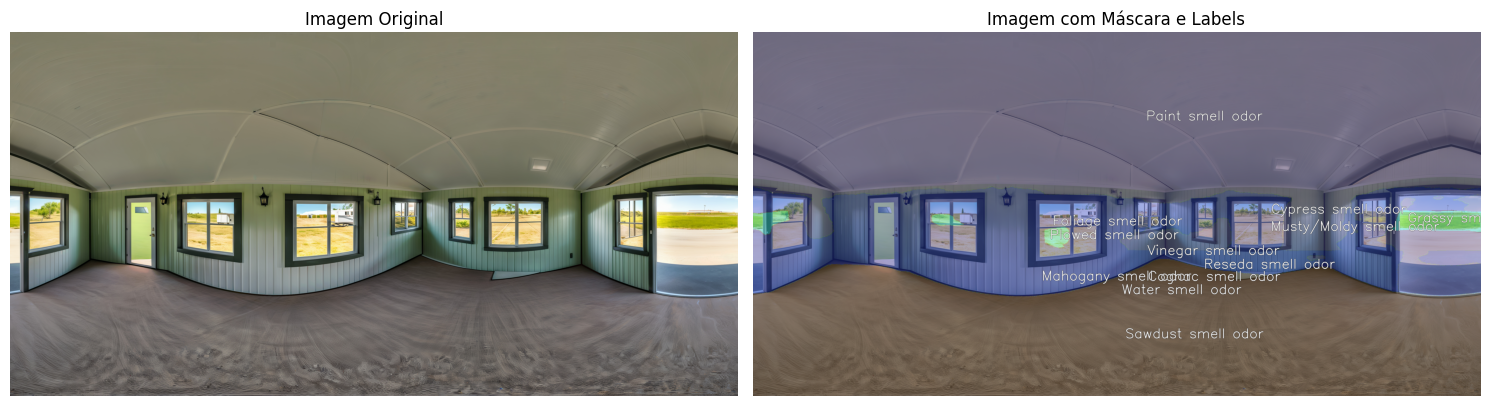

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Função para mapear os valores dos tons de cinza para labels
def load_labels(mapping_file):
    labels = {}
    with open(mapping_file, 'r') as file:
        for line in file:
            parts = line.strip().split(':')
            if len(parts) == 2:
                value, label = parts
                gray_value = int(label.split()[0])
                label_name = value.strip()
                labels[gray_value] = label_name
    return labels

# Função para ajustar a posição das labels considerando o tamanho da fonte
def adjust_label_position(existing_positions, x, y, label, font_scale=5, thickness=8, margin=30):
    text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
    text_width, text_height = text_size
    for (px, py, pw, ph) in existing_positions:
        if abs(px - x) < (text_width + margin) and abs(py - y) < (text_height + margin):
            y += (ph + margin)  # Ajusta a posição para evitar sobreposição
    return x, y, text_width, text_height

# Carregar a imagem original e a máscara
image_path = "/content/drive/MyDrive/100_SofiaFRA/100_select/ADE_val_00000539.jpg"  # Substituir pelo caminho da imagem original
mask_path = "/content/drive/MyDrive/100_SofiaFRA/Results/Cat-seg/ADE_val_00000539_mask.jpg"
mapping_file_path = "/content/drive/MyDrive/100_SofiaFRA/Results/Cat-seg/ADE_val_00000539_mapping.txt"

original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Carregar os mapeamentos de labels
labels = load_labels(mapping_file_path)

# Criar a máscara colorida
unique_values = np.unique(mask)
colored_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
np.random.seed(0)  # Para resultados consistentes
color_map = {value: np.random.randint(0, 255, size=3) for value in unique_values}

for value in unique_values:
    colored_mask[mask == value] = color_map[value]

# Combinar a imagem original com a máscara colorida
combined_image = cv2.addWeighted(original_image, 0.6, colored_mask, 0.4, 0)

# Adicionar as labels na imagem combinada com ajuste de posição
combined_image_with_labels = combined_image.copy()
existing_positions = []
for gray_value, label in labels.items():
    positions = np.where(mask == gray_value)
    if len(positions[0]) > 0:
        y, x = np.median(positions[0]).astype(int), np.median(positions[1]).astype(int)
        x, y, text_width, text_height = adjust_label_position(existing_positions, x, y, label, font_scale=5, thickness=8, margin=50)
        existing_positions.append((x, y, text_width, text_height))
        # Adicionar borda preta
        cv2.putText(combined_image_with_labels, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 0), 12, cv2.LINE_AA)
        # Adicionar texto branco por cima
        cv2.putText(combined_image_with_labels, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 255, 255), 8, cv2.LINE_AA)

# Plotar as imagens
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

axs[0].imshow(original_image)
axs[0].set_title("Imagem Original")
axs[0].axis("off")

axs[1].imshow(combined_image_with_labels)
axs[1].set_title("Imagem com Máscara e Labels")
axs[1].axis("off")

plt.tight_layout()
plt.show()
